In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
train_data = pd.read_csv('./data/train_in.csv', header=None)
train_label = pd.read_csv('./data/train_out.csv', header=None)
train_data.shape


(1707, 256)

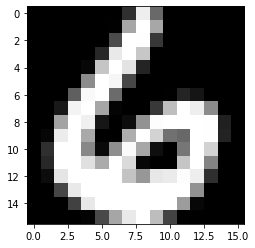

In [3]:
first_image = train_data.iloc[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((16, 16))
plt.imshow(pixels, cmap='gray')
plt.show()

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [5]:
labels_array = train_label.values.flatten()
images_array = train_data.values

defaultdict(<class 'int'>, {6: 151, 5: 88, 4: 122, 7: 166, 3: 131, 1: 252, 0: 319, 8: 144, 2: 202, 9: 132})


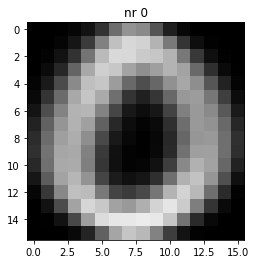

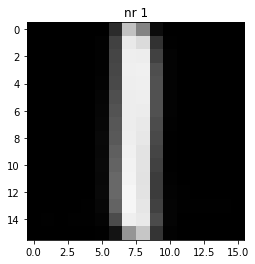

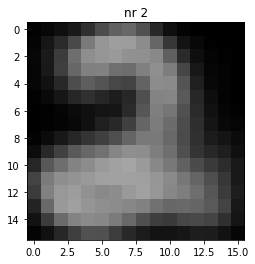

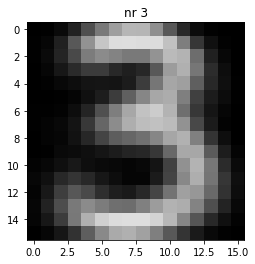

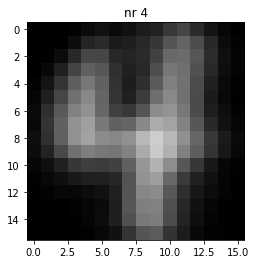

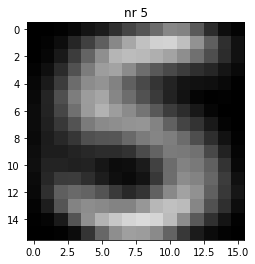

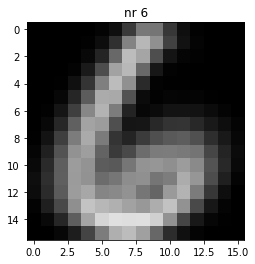

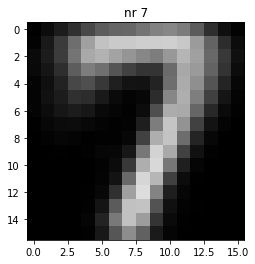

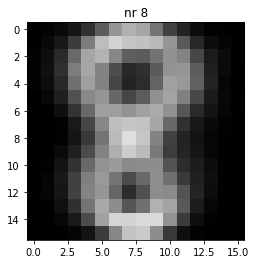

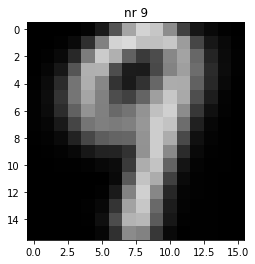

In [6]:
from functools import partial

dist = defaultdict(partial(np.ndarray, 0))
label_counter = defaultdict(int)


for i in range(10):
    dist[i] = np.zeros(256)




counter = 0
for image, label in zip(images_array, labels_array):
    dist[label] += image
    label_counter[label] += 1

    #label_counter[label] += image

print(label_counter)

for label, image_sum in dist.items():
    dist[label] = dist[label] / label_counter[label]
    image = np.array(dist[label], dtype='float')
    pixels = image.reshape((16, 16))
    plt.imshow(pixels, cmap='gray', vmin=-1, vmax=1)
    plt.title("nr " + str(label))
    plt.show()





In [7]:
def distance(image1, image2):
    assert len(image1) == len(image2)
    return np.sum((image1 - image2)**2)

In [18]:
distCloud = []

for first_label in range(10):
    temp = []
    for second_label in range(first_label + 1, 10):
        diff = distance(dist[first_label], dist[second_label])
        temp.append(round(diff,2))
    if len(temp) > 0:
        distCloud.append(temp)

print('\n'.join([' |  '.join(['{:4}'.format(item) for item in row]) 
      for row in distCloud]))        

208.79 |  87.13 |  83.61 |  115.99 |  56.54 |  66.49 |  140.77 |  98.17 |  131.99
102.52 |  137.67 |  103.51 |  123.63 |  112.67 |  115.42 |  101.74 |  98.65
66.88 |  62.93 |  62.52 |  53.76 |  78.72 |  50.09 |  78.99
82.58 |  37.44 |  86.53 |  79.61 |  49.29 |  69.8
64.02 |  77.13 |  57.5 |  54.48 |  36.13
44.87 |  84.86 |  48.54 |  68.2
118.55 |  73.74 |  108.99
71.7 |  29.45
40.97


In [9]:
test_data = pd.read_csv('./data/test_in.csv', header=None)
test_label = pd.read_csv('./data/test_out.csv', header=None)


labels_array_test = test_label.values.flatten()
images_array_test = test_data.values


In [14]:

counter = 0

for img, true_label in zip(images_array_test, labels_array_test):
    current_dist = float('inf')
    currently_guessed = 0
    for label, image in dist.items():
        c = distance(img, image)
        if current_dist > c:
            target_label = label
            current_dist = c
    
    if target_label == true_label:
        counter += 1

print("accuracy for test set: " + str(100 * counter / len(labels_array_test)) + "%")

accuracy for test set: 80.4%


In [16]:
counter = 0

for img, true_label in zip(images_array, labels_array):
    current_dist = float('inf')
    currently_guessed = 0
    for label, image in dist.items():
        c = distance(img, image)
        if current_dist > c:
            target_label = label
            current_dist = c
    
    if target_label == true_label:
        counter += 1

print("accuracy for test set: " + str(100 * counter / len(labels_array)) + "%")

accuracy for test set: 86.35032220269478%


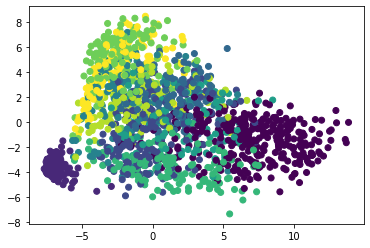

In [53]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(images_array)
trans_pca_r = pca.transform(images_array)

xs = [p[0] for p in trans_pca_r]
ys = [p[1] for p in trans_pca_r]

plt.scatter(xs, ys, c= labels_array, label=labels_array)
plt.show()

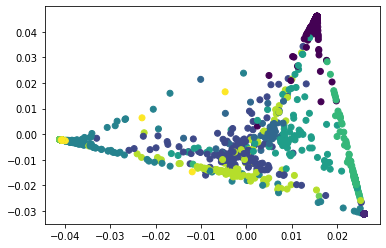

In [50]:
from sklearn.manifold import LocallyLinearEmbedding


embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(images_array)

xs = [p[0] for p in X_transformed]
ys = [p[1] for p in X_transformed]

plt.scatter(xs, ys, c= labels_array, label=labels_array)
plt.show()


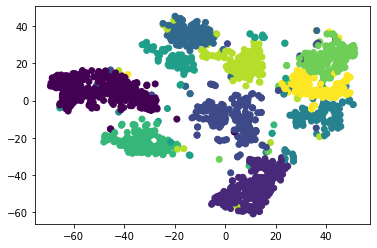

In [51]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(images_array)

xs = [p[0] for p in X_embedded]
ys = [p[1] for p in X_embedded]

plt.scatter(xs, ys, c= labels_array, label=labels_array)
plt.show()


Minimum error:- 0.085 at K = 1


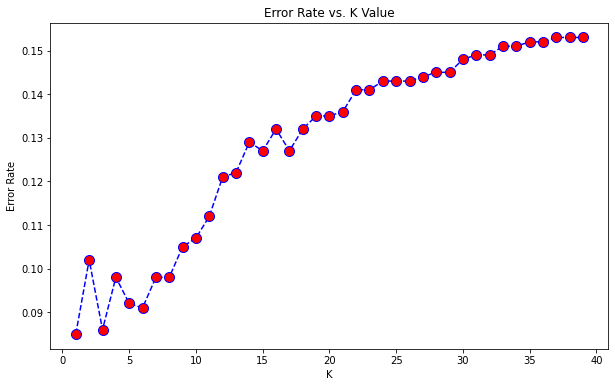

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(images_array, labels_array)
    pred_i = knn.predict(images_array_test)
    error_rate.append(np.mean(pred_i != labels_array_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) +1 )

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=1) 
neigh.fit(images_array, labels_array)
predicted = neigh.predict(images_array_test)


cm = confusion_matrix(labels_array_test, predicted)
print(cm)

[[219   0   2   0   0   0   1   1   0   1]
 [  0 118   0   0   0   0   2   1   0   0]
 [  5   1  84   2   0   0   1   3   4   1]
 [  3   0   2  71   0   2   0   0   0   1]
 [  0   2   3   0  77   0   0   2   0   2]
 [  3   0   0   5   0  41   0   3   2   1]
 [  4   0   0   0   2   0  84   0   0   0]
 [  0   1   0   1   3   0   0  59   0   0]
 [  1   1   0   6   0   2   1   1  78   2]
 [  1   0   0   0   0   0   0   2   1  84]]


In [45]:
for i in range(len(cm)):
    counter = 0
    for j in range(len(cm[i])):
        if i != j:
            counter += cm[i][j]

    print("The number {} was classified wrongly {} / {}".format(i, counter, counter + cm[i][i]))
         

The number 0 was classified wrongly 5 / 224
The number 1 was classified wrongly 3 / 121
The number 2 was classified wrongly 17 / 101
The number 3 was classified wrongly 8 / 79
The number 4 was classified wrongly 9 / 86
The number 5 was classified wrongly 14 / 55
The number 6 was classified wrongly 6 / 90
The number 7 was classified wrongly 5 / 64
The number 8 was classified wrongly 14 / 92
The number 9 was classified wrongly 4 / 88


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_array_test, predicted)

0.915

In [37]:
from sklearn.metrics import recall_score

print(recall_score(labels_array_test, predicted, average='macro'))
print(recall_score(labels_array_test, predicted, average='micro'))
print(recall_score(labels_array_test, predicted, average='weighted'))

0.8981685786029999
0.915
0.915


# Exercise 2

In [168]:
import numpy as np
epochs = 20
W = np.random.normal(size=(257,10))
W.shape

(257, 10)

In [155]:
W[0]

array([-0.61195924, -0.44215072,  0.05852672,  3.24140742, -0.14591882,
        0.75727485, -1.19061191,  0.39321159,  2.25700783,  1.00427253])

In [169]:
for epoch in range(epochs): # number of epochs
    for img, true_label in zip(images_array_test, labels_array_test):

        # add to it
        x_i = np.insert(img, 0, 1).reshape(-1,1)

        result = np.dot(x_i.T, W)
        current_value = result[0][true_label]
        index = 0
        x_i = x_i.flatten()

        for value in result[0]:
            if value > current_value: # nodes that are more active than the real one
                W[:, index] = W[:, index] - x_i

            index+=1
        
        # update the current node
        W[:, true_label] = W[:, true_label] + x_i

        #print(str(np.argmax(result)) + ' vs ' + str(true_label))


In [170]:

counter = 0

for img, true_label in zip(images_array_test, labels_array_test):

    # add to it
    x_i = np.insert(img, 0, 1).reshape(-1,1)

    result = np.dot(x_i.T, W)
    x_i = x_i.flatten()

    predicted = np.argmax(result[0])

    if predicted == true_label:
        counter +=1


print(counter / len(images_array_test))

0.746


# Exercise 3

In [68]:
import numpy as np
import math


def sigmoid(x):
    return 1/(1 + np.exp(-x))

def xor_net(x1, x2, weights):

    # check with the teacher !!
    assert x1 ==0 or x1 == 1
    assert x2 == 0 or x2 == 1

    input_layer = np.array([x1,x2, 1])
    first_layer_weights = np.array(weights[:6]).reshape(3, 2)

    output_first_layer = np.matmul(input_layer, first_layer_weights)

    output_first_layer = sigmoid(output_first_layer)

    output_first_layer = [*output_first_layer, 1]

    second_layer_weights = np.array([weights[6:]])
    output_layer = np.matmul(output_first_layer, second_layer_weights.T)
    output_layer = sigmoid(output_layer)
    #print(output_layer)
    return output_layer
    


In [84]:
def mse(weights):

    # should we do this this way?
    inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    expected_output = np.array([0,1,1,0])


    val = 0
    for i in range(len(inputs)):
        predicted = xor_net(inputs[i][0], inputs[i][1], weights)
        val += (predicted - expected_output[i]) ** 2

    val = val/len(inputs)

    return val



In [86]:
mse([1,2,3,4,5,4,1,1,1])

array([0.45428908])

In [ ]:
def grdmse(weights):
        
